<font size=6  color=#003366> [LEPL1109] - STATISTICS AND DATA SCIENCES <br><br> 
(PART II) TP 03 - Clustering: Discovery of PCA and K-Means   </font> <br><br><br>

<font size=5  color=#003366>
Prof. D. Hainaut<br>
Prof. L. Jacques<br>

</font>

---
Table of content: 
* 1 - PCA (Principal Component Analysis) (1h)
   - 1.1 - Load data
   - 1.2 - PCA for visualization 
   - 1.3 - PCA for feature extraction 
    <br><br>
* 2 - KMeans (1h)
    - 2.1 - Load data
    - 2.2 - Feature selection
    - 2.3 - Visualization
    - 2.4 - Clustering with Kmeans
    - 2.5 - Further vizualization
---

<br>
<font size=6 color=#009999> 1 - PCA (Principal Component Analysis)  </font> <br>
<br>

**Principal Component Analysis** (PCA) is a key instrument for machine learning. It allows to **reduce dimensions** of a data matrix and maximize the **proportion of the variance explained (PVE)** in the obtained reduced data. Reducing the dimension is useful for two main reasons:
<ol>
    <li> Being able to <b>visualize</b> the data. Indeed, ploting high-dimension objects is impossible, and humans can easily analyse 2 or 3 D plots. 
    <li> Having a <b>better input</b> for machine learning models. Indeed, lower-dimension models need less memory and computational efforts. On another hand, as explained in the first exercice session: "Models have increasing risk of overfitting with increasing number of features (curse of dimensionality). Uninformative features then act as noise for the machine learning model that can perform terribly poorly." Using methods as PCA allows to do a <b>feature extraction</b> on the input data!
        
</ol>

<br><br>
<font size=5 color=#009999> 1.1 - Load data </font> <br>
<font size=4 color=#009999>
HOUSE PRICES
</font> <br> <br>
</font>



Let's reuse the same data as in TP1 (house_prices). Your goal is to determine if the use of k-nearest neighbors is appropriate for evaluating the overall quality of a house.  

<div class="alert alert-info">
<b>EXERCISE 1 </b> <br>  
<b> We provide you the code for this exercise. However, understand what is done in the cell below. </b><br> 
<ol>
   <li>In this exercice, we will only consider quantitative features (with type "float" or "integer") and neglect categorical ones. Therefore, you should first import the dataset and remove all unused features (you can use <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html"> select_dtypes</a> for this purpose). <br> <br>
   <li> Remove also the first column that contains the ID of the house. Then, you can remove all rows with missing data.  <br> <br> 
       
   <li> Observe the characteristics of this cleaned dataset (number and type of features) as well as the statistics of at least 10 features. <br><br>
   
   <li>Separate your data from the target (column <code>OverallQual</code>), using for example  <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
"> drop</a>, and scale your dataset. 
</ol>
    
</div> 

In [43]:
# Nothing to do in this cell :) Run me!

import numpy as np
import pandas as pd
from sklearn import preprocessing
from IPython.display import display

# Import the dataset and discard non-quantitative features
data      = pd.read_csv("house_prices.csv")
dataClean = data.select_dtypes(include=["float64", "integer"])
dataClean = dataClean.dropna()

# Remove the ID of the house (first column)
dataClean2 = dataClean.drop(["OverallQual", "Id"], axis=1)

# Observe the dataset
dataClean2.info()
display(dataClean2.describe())

# Discard the target (y) from the data (X) and scale the data 
y_obs  = dataClean["OverallQual"]
X_data = np.array(dataClean2)
X_data = preprocessing.scale(X_data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1121 non-null   int64  
 1   LotFrontage    1121 non-null   float64
 2   LotArea        1121 non-null   int64  
 3   OverallCond    1121 non-null   int64  
 4   YearBuilt      1121 non-null   int64  
 5   YearRemodAdd   1121 non-null   int64  
 6   MasVnrArea     1121 non-null   float64
 7   BsmtFinSF1     1121 non-null   int64  
 8   BsmtFinSF2     1121 non-null   int64  
 9   BsmtUnfSF      1121 non-null   int64  
 10  TotalBsmtSF    1121 non-null   int64  
 11  1stFlrSF       1121 non-null   int64  
 12  2ndFlrSF       1121 non-null   int64  
 13  LowQualFinSF   1121 non-null   int64  
 14  GrLivArea      1121 non-null   int64  
 15  BsmtFullBath   1121 non-null   int64  
 16  BsmtHalfBath   1121 non-null   int64  
 17  FullBath       1121 non-null   int64  
 18  HalfBath

,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,...,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,56.146298,70.665477,10122.956289,5.561106,1972.264942,1985.683318,108.487957,438.399643,44.589652,594.125781,...,92.610169,46.130241,21.844781,3.348796,16.100803,2.934880,23.429081,6.339875,2007.795718,185506.152542
std,41.772684,24.266812,8129.302641,1.068236,30.967730,21.025974,189.500966,468.385038,157.828725,450.259657,...,121.868623,64.390029,61.282083,29.772540,57.801829,40.222087,165.759816,2.687854,1.335043,82999.159004
min,20.000000,21.000000,1300.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,60.000000,7590.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,250.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,131000.000000
50%,50.000000,70.000000,9416.000000,5.000000,1974.000000,1995.000000,0.000000,374.000000,0.000000,506.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,164900.000000
75%,70.000000,80.000000,11361.000000,6.000000,2003.000000,2005.000000,170.000000,702.000000,0.000000,840.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,219500.000000
max,190.000000,313.000000,215245.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,648.000000,2500.000000,12.000000,2010.000000,755000.000000


<br><br>
<font size=5 color=#009999> 1.2 - PCA for visualization </font> <br>
<font size=4 color=#009999>
REDUCE DIMENSIONS TO PLOT DATA
</font> <br> <br>
</font>



Even after this first cleaning, it is difficult to observe the dataset and to know whether neighbors have the same overall quality or not. You could observe each features, or observe features by groups of 2 or 3, but this requires a huge amount of work as they are 36 features left, even after cleaning! Moreover, the pair-wise distance between two observations in one feature is not always representative of the pair-wise distance between these two observations in the original features space (two houses can have been built the same year but be very different for all other features, for example).

Nevertheless, there exists a powerful tool to reduce the size of data and make it easier to observe: the Principal Component Analysis (PCA). 


<div class="alert alert-info">
<b>EXERCISE 2 </b> <br>  
    
Use the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA">PCA</a> from scikit learn to reduce your data to 2 and 3 dimensions. Observe the two obtained datasets. Would you recommend a method based on neighbors? (Do not forget that you only have parts of the observation, as the data was reduced from dimension 36 to 2 or 3!)  
    
</div>   


In [44]:
from sklearn.decomposition import PCA
import plotly.express as px


pca2 = PCA(n_components=2)
pca3 = PCA(n_components=3)
pca2.fit(X_data) #Les fits apprennent les axes
pca3.fit(X_data)


X_data2 = pca2.transform(X_data) #Les transforms projettent
X_data3 = pca3.transform(X_data)


fig = px.scatter(x=X_data2[:, 0], y=X_data2[:, 1], color=y_obs)
fig.show()

fig = px.scatter_3d(x=X_data3[:, 0], y=X_data3[:, 1], z=X_data3[:, 2], color=y_obs)
fig.show()


To feel more secure about your choice, you can analyse the percentage of variance expressed (PVE) by your PCA. This percentage can be found from the singular values: $$\frac{\sum_{i=1}^r\sigma_i^2}{\sum_{j=1}^n\sigma_j^2}$$ where $n$ is the dimension of the data (here 36), and $r$ the reduced dimention (here 2 or 3). Note that this formula is correct only if the original features are zero-mean. 


<div class="alert alert-info">
<b>EXERCISE 3 </b> <br>  
    
Check the percentage of variance expressed by your two datasets (read carefully the API of the PCA function ;) ).
    
</div>   



In [45]:
PVE2 = pca2.explained_variance_ratio_
PVE3 = pca3.explained_variance_ratio_


print("PVE2 : " + str(PVE2) + " sum = " + str(np.sum(PVE2)))
print("PVE3 : " + str(PVE3)+ " sum = " + str(np.sum(PVE3)))

#Gain de variance diminue à chaque ajout d'axes



PVE2 : [0.21022169 0.08770934] sum = 0.29793103373992874
PVE3 : [0.21022169 0.08770934 0.07453373] sum = 0.3724647689441228


<br><br>
<font size=5 color=#009999> 1.3 - PCA for feature extraction </font> <br>
<font size=4 color=#009999>
REDUCE DIMENSIONS TO TRAIN A MODEL
</font> <br> <br>
</font>


Your goal is now to apply a k-nearest neighbors algorithm on your data, to recover the <code>OverallQual</code> of houses. As in TP1, we consider that this target is <b>binary</b> and is equals to <b>zero</b> if the <code>OverallQual</code> is evaluated to five or less, and <b>one</b> otherwise. 

You can use 5 neighbors in your model and use `distance` as weights. To evaluate it, we suggest you to use the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html">cross_val_score</a> from sklearn, with scoring = `'accuracy'` and default values otherwise.  

<div class="alert alert-info">
<b>EXERCISE 4 </b> <br>  
    <ol>
        <li> What does the <code> cross_val_score </code> and how can you use it to evaluate your model? <br> <br>
        <li> Observe the percentage of variance expressed by each dimension, and plot the evolution of the cumulative percentage with respect to the number of dimensions considered. What is the shape of this cumulative plot?  <br> <br>
        <li> Keep the number of dimensions needed to express 90% of the variance and apply your algorithm on this dataset. Compare your results with the results you obtained at previous point.  <br> <br>
        <li> Do the same for data expressing 50% of the variance.
    </ol>
</div>

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [47]:
binary_y = np.where(y_obs > 5, 1, 0)

clf = KNeighborsClassifier(n_neighbors=5, weights='distance')
cscores2 = cross_val_score(clf,X_data2,y=binary_y,scoring='accuracy')
cscores3 = cross_val_score(clf,X_data3,y=binary_y,scoring='accuracy')
print("Mean for 2 : " + str(np.mean(cscores2)))
print("Mean for 3 : " + str(np.mean(cscores3)))

Mean for 2 : 0.7948015873015872
Mean for 3 : 0.8108531746031746


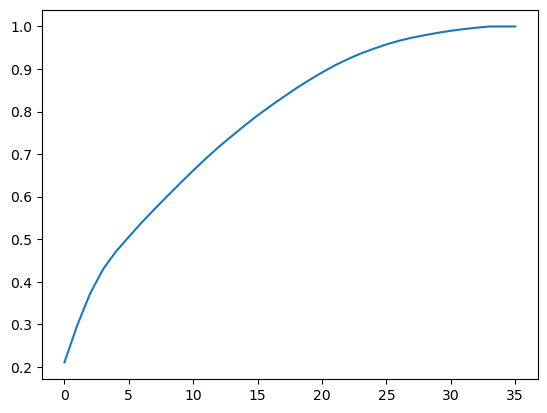

In [48]:
# cross_val_score Fait de la cross validation sur plusieurs samples afin de faire un pourcentage en moyenne

pcaT = PCA(n_components=36)
pcaT.fit(X_data)
vt = pcaT.explained_variance_ratio_
cumul = np.cumsum(vt)
plt.plot(cumul)
plt.show()



    

In [49]:
toKeep = 36

for i in range(37):
    pcaT = PCA(n_components=i)
    pcaT.fit(X_data)
    vt = pcaT.explained_variance_ratio_
    cumul = np.sum(vt)

    if cumul >= 0.50:
        toKeep = i
        break
       
print("For 50% : " +str(toKeep))
print(vt)

for i in range(37):
    pcaT = PCA(n_components=i)
    pcaT.fit(X_data)
    vt = pcaT.explained_variance_ratio_
    cumul = np.sum(vt)

    if cumul >= 0.90:
        toKeep = i
        break

print("For 90% : " +str(toKeep))
print(vt)
 

For 50% : 6
[0.21022169 0.08770893 0.07453355 0.05672714 0.04182246 0.0340889 ]
For 90% : 22
[0.21022169 0.08770935 0.07453374 0.0567311  0.0418336  0.03441715
 0.03374241 0.0316688  0.03071506 0.03033228 0.02959174 0.02861677
 0.02722234 0.02524521 0.02478317 0.02369792 0.02199232 0.0211072
 0.02074489 0.0189827  0.01796676 0.0168    ]


In [50]:
pca2 = PCA(n_components=6)
pca3 = PCA(n_components=22)
pca2.fit(X_data) #Les fits apprennent les axes
pca3.fit(X_data)


X_data2 = pca2.transform(X_data) #Les transforms projettent
X_data3 = pca3.transform(X_data)

clf = KNeighborsClassifier(n_neighbors=5, weights='distance')


binary_y = np.where(y_obs > 5, 1, 0)


cscores2 = cross_val_score(clf,X_data2,y=binary_y,scoring='accuracy')
cscores3 = cross_val_score(clf,X_data3,y=binary_y,scoring='accuracy')

print("Mean for 6 : " + str(np.mean(cscores2)))
print("Mean for 22 : " + str(np.mean(cscores3)))




Mean for 6 : 0.8001468253968254
Mean for 22 : 0.8171349206349205


<br>
<font size=6 color=#009999> 2 - KMeans  </font> <br>
<br>

<br>
<font size=5 color=#009999> 2.1 - Load data </font> <br>
<font size=4 color=#009999>
IRIS DATASET
</font> <br> <br>
</font>

In this **clustering** exercise, we are going to use the well-known [iris](https://archive.ics.uci.edu/ml/datasets/iris) dataset.

<div class="alert alert-info">
<b>EXERCISE 5 </b> <br>
    Import the dataset and scale it. You are also asked to provide the number of classes (in $y$), the number of samples and the number of features (in $X$).
</div>



In [52]:
# Idea from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

from sklearn.datasets import load_iris
from sklearn.preprocessing import scale

np.random.seed(42)  # For reproductibility

iris = load_iris()
X    = pd.DataFrame(data=iris["data"], columns=iris["feature_names"])
y    = pd.Series(data=iris["target"])

data_scaled = scale(X)

n_class    = max(y) + 1
n_samples  = len(X)
n_features = len(X.columns)


print(
    "n_class: %d, \t n_samples: %d, \t n_features: %d"
    % (n_class, n_samples, n_features)
)

n_class: 3, 	 n_samples: 150, 	 n_features: 4


<br><br>
<font size=5 color=#009999> 2.2 - Feature selection </font> <br>
<font size=4 color=#009999>
EXAMPLE WITH LINEAR REGRESSION MODEL
</font> <br> <br>
</font>

In order to simplify vizualization, we propose you to use a linear regression model to select the <b>three most important features</b>. First, we fit the model. Then, we consider that most important features correspond to larger coefficient in the linear regressor. <br>


In [55]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LinearRegression
from scipy import stats

clf         = LinearRegression().fit(X, y)
importance  = np.abs(clf.coef_)
idxSelected = importance.argsort()[-3:]
data        = data_scaled[:, idxSelected]


#Les features les plus importants
print('-'*10 , ' Importance of features ', '-'*10)
print(importance)

----------  Importance of features  ----------
[0.11190585 0.04007949 0.22864503 0.60925205]


<br><br>
<font size=5 color=#009999> 2.3 - Visualization </font> <br>
<font size=4 color=#009999>
HOW DIFFICULT IS THE CLUSTERING TASK?
</font> <br> <br>
</font>


</font>
<div class="alert alert-info">
<b>EXERCISE 6 </b> <br>
Vizualize the data with the following code. Which clusters will be the easier to detect? Comment on the importance of the number of labels.
</div>


In [54]:
import plotly.express as px
import pandas as pd
import re

df = px.data.iris()


data_df = pd.DataFrame(data, columns=X.columns[idxSelected])
new_name = {col: re.sub("\s\(cm\)", " (scaled)", col) for col in X.columns}
data_df.rename(columns=new_name, inplace=True)

fig = px.scatter_3d(
    data_df, x=data_df.columns[0], y=data_df.columns[1], z=data_df.columns[2], color=y
)
fig.show()

#Il faut plus de labels

<br><br>
<font size=5 color=#009999> 2.4 - Clustering with Kmeans </font> <br>
<font size=4 color=#009999>
IMPACT OF THE INITIALIZATION
</font> <br> <br>
</font>


<div class="alert alert-info">
<b>(BONUS) EXERCISE 7 </b> <br>
Use the sklearn <code>KMeans</code> to obtain the three clusters. Compare two initializations: <code>k-means++</code> and <code>random</code>. Compare a single initialization with 5 and 10 different initializations.
</div>
    
You can use the helping function `bench_k_means` to benchmark the different initializations.

The different metrics are explained in <a href="Metrics.pdf">Metrics.pdf</a>.


In [56]:
from time import time

from sklearn import metrics
from sklearn.cluster import KMeans

print(82 * "_")
print("init\t\ttime\tinertia\tARI\tsilhouette")


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print(
        "%-9s\t%.2fs\t%.3f\t%.3f\t%.3f"
        % (
            name,
            (time() - t0),
            estimator.inertia_,
            metrics.adjusted_rand_score(y, estimator.labels_),
            metrics.silhouette_score(
                data_scaled,
                estimator.labels_,
                metric="euclidean",
                sample_size=n_samples,
            ),
        )
    )



print(82 * "_")

__________________________________________________________________________________
init		time	inertia	ARI	silhouette
__________________________________________________________________________________


<div class="alert alert-info">
<b>EXERCISE 8 </b> <br>
    
Use the function <code>plot_diff_cluster</code> from the <code>helping_functions</code> to visualize where your clustering fails, e.g., <br><br>
<code>plot_diff_cluster(y, y_pred, data_df)</code>. <br><br>
Comments on your observations.
</div>

In [64]:
from helping_functions import plot_diff_cluster

km = KMeans(n_clusters=n_class,init = 'k-means++', n_init=1)
km.fit(data)

y_pred = km.predict(data)

plot_diff_cluster(y,y_pred,data_df)

<br><br>
<font size=5 color=#009999> 2.5 - Further vizualization </font> <br>
<font size=4 color=#009999>
PCA TO THE RESCUE
</font> <br> <br>
</font>


Assume we would like to further decrease the dimensionality of our dataset to represent it in 2D. We could also use feature selections and only keep two features, but this is equivalent to discard 50% of the data. This would be even worse for a real dataset with dozens or hundreds of features.

<div class="alert alert-info">
<b>EXERCISE 9 </b> <br>

Use PCA to reduce the dimensionality of the dataset to two and perform the kmeans on
    <ol>
        <li>the initial (4D) dataset;
        <li>the reduced (2D) dataset.
    </ol>

Compare both models. <br>You can also visualize the clustering <b>in 2D case</b> using function <code>visualize_k_means</code> from <code>helping_functions.py</code>
    
</div>


k-means++ Initial	0.05s	140.033	0.592	0.463
k-means++ 10	0.03s	59.105	0.673	0.442


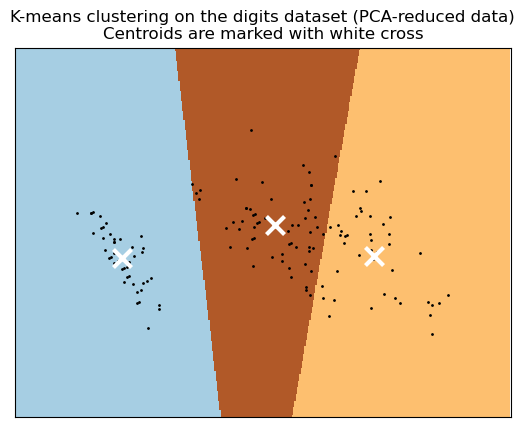

In [72]:
from helping_functions import visualize_k_means

# On initial data
bench_k_means(
    KMeans(init="k-means++", n_clusters=n_class, n_init=10),
    name="k-means++ Initial",
    data=data_scaled,
)

# #############################################################################
# Visualize the results on PCA-reduced data


pca = PCA(n_components=2)
pca.fit(data)
reduced_data = pca.transform(data)

km = KMeans(n_clusters=n_class,init = 'k-means++', n_init=1)

km.fit(reduced_data)
kmeans = km.predict(reduced_data)

bench_k_means(
    KMeans(init="k-means++", n_clusters=n_class, n_init=10),
    name="k-means++ 10",
    data=reduced_data,
)
visualize_k_means(reduced_data, km)

Remark: this exercise is inspired from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html.
